Import all required library 

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now load dataset

In [2]:
data=pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#AS per the problem statement
data['Age'] = data['Rings']+1.5 
data.drop('Rings', axis = 1, inplace = True)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [4]:
data.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [5]:
data.shape

(4177, 9)

 We have seen that the sex columns has objective type so we have to convert into int value for better prediction.

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [7]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [8]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

We have seen that their is no null value in the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), int32(1)
memory usage: 277.5 KB


<AxesSubplot:>

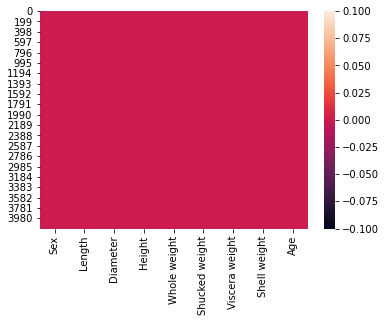

In [10]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Age', ylabel='count'>

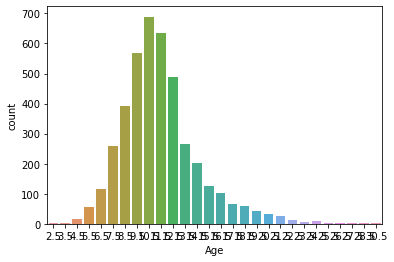

In [11]:
sns.countplot(data['Age'])

In [12]:
data.value_counts(['Age'])

Age 
10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
27.5      1
2.5       1
26.5      1
3.5       1
30.5      1
dtype: int64

In [13]:
data.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

In [14]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

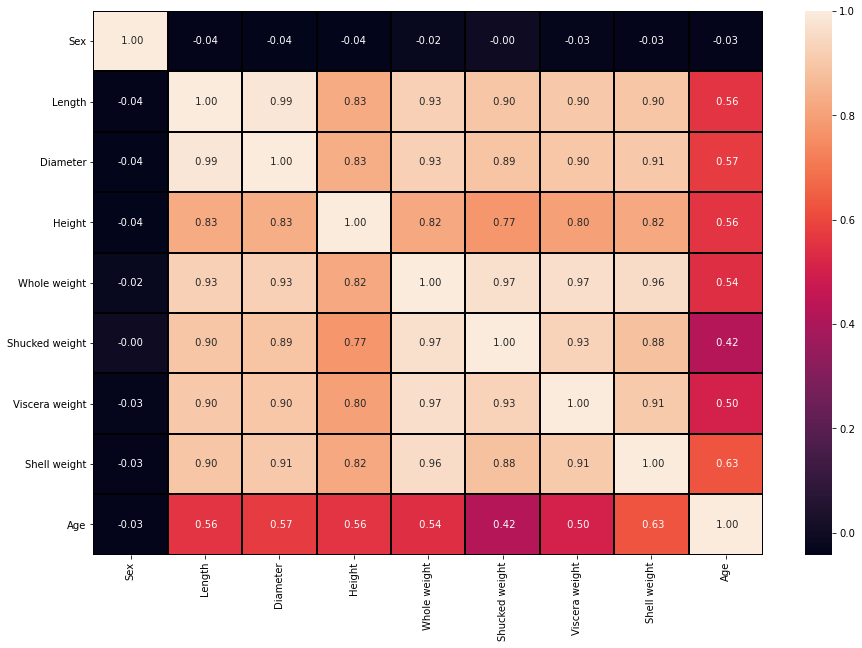

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

we have seen that the Sex columns is show the negative relation with Age so we have drop the Sex columns 

In [16]:
data=data.drop(['Sex'],axis=1)

In [17]:
data.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


Here we will perform bivariate analysis using scatter plot.

<AxesSubplot:xlabel='Length', ylabel='Age'>

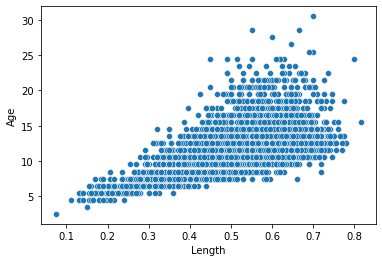

In [18]:
sns.scatterplot(x='Length',y='Age',data=data)

<AxesSubplot:xlabel='Diameter', ylabel='Age'>

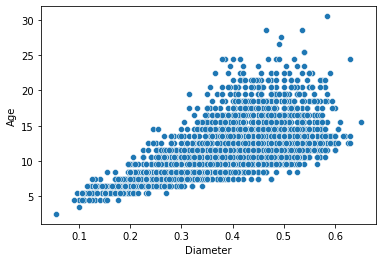

In [19]:
sns.scatterplot(x='Diameter',y='Age',data=data)

<AxesSubplot:xlabel='Height', ylabel='Age'>

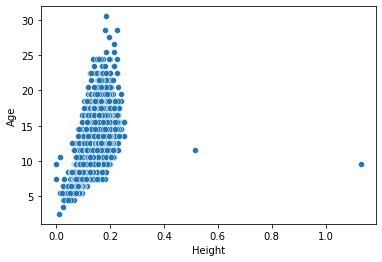

In [20]:
sns.scatterplot(x='Height',y='Age',data=data)

<AxesSubplot:xlabel='Whole weight', ylabel='Age'>

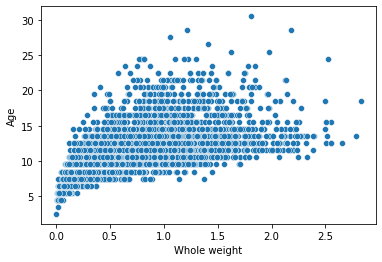

In [21]:
sns.scatterplot(x='Whole weight',y='Age',data=data)

<AxesSubplot:xlabel='Shucked weight', ylabel='Age'>

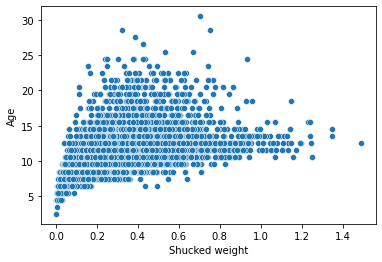

In [22]:
sns.scatterplot(x='Shucked weight',y='Age',data=data)

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

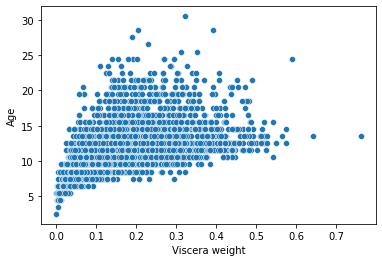

In [23]:
sns.scatterplot(x='Viscera weight',y='Age',data=data)

<AxesSubplot:xlabel='Shell weight', ylabel='Age'>

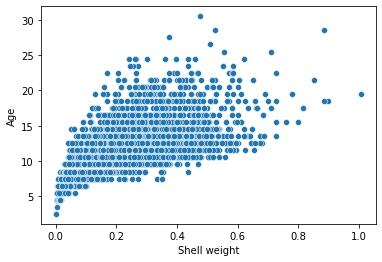

In [24]:
sns.scatterplot(x='Shell weight',y='Age',data=data)

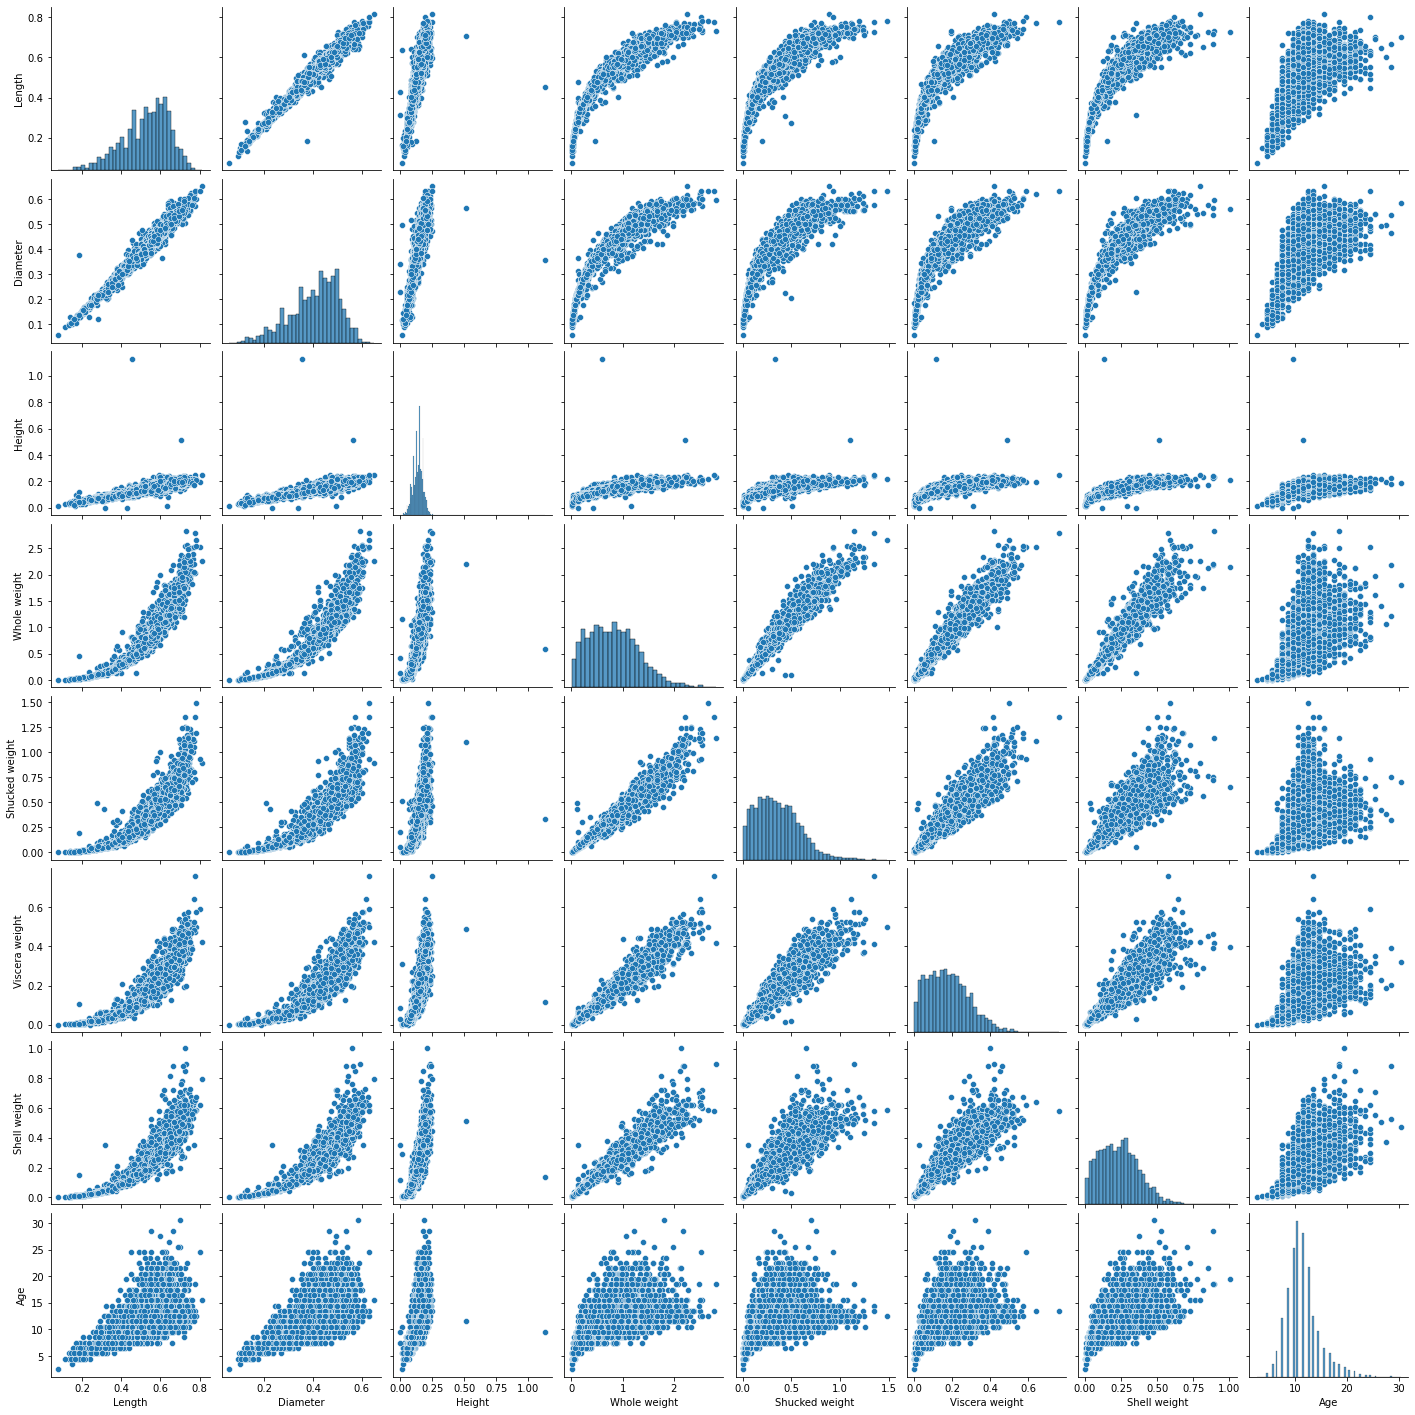

In [25]:
sns.pairplot(data)

In [26]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [27]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

Here we can see skewness is present inside our dataset. Length, Diameter and Height having more skewness and other fector also show the little bit skewness.

In [28]:
data.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


<AxesSubplot:xlabel='Length', ylabel='Density'>

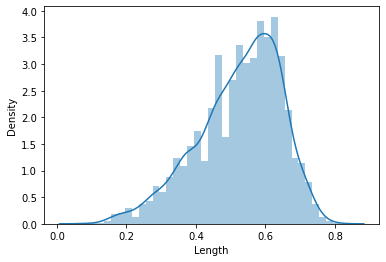

In [29]:
sns.distplot(data['Length'])

we have seen that the Length show the less skewness 

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

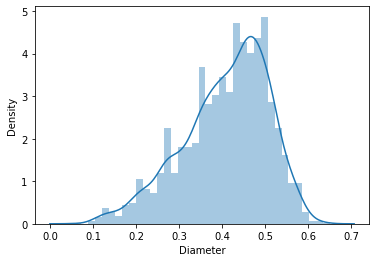

In [30]:
sns.distplot(data['Diameter'])

we have seen that the Diameter show the less skewness 

<AxesSubplot:xlabel='Height', ylabel='Density'>

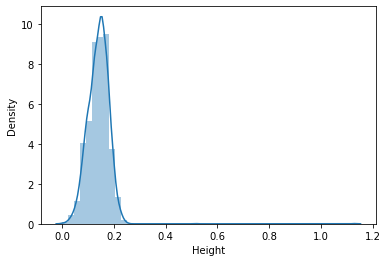

In [31]:
sns.distplot(data['Height'])

their is no skewness present in Height 

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

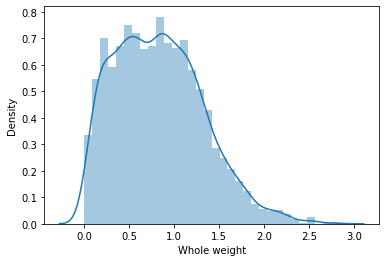

In [32]:
sns.distplot(data['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

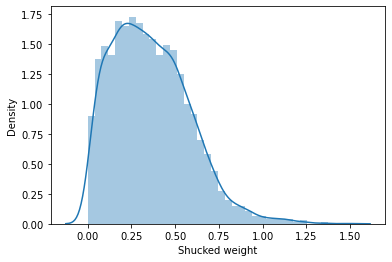

In [33]:
sns.distplot(data['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

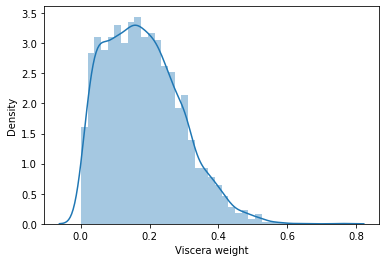

In [34]:
sns.distplot(data['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

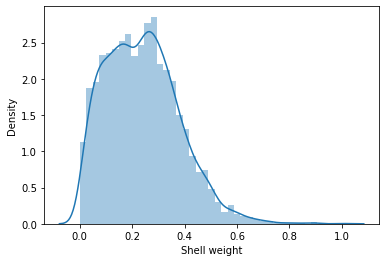

In [35]:
sns.distplot(data['Shell weight'])

Here we observed the heigh skewness present in Shell weight, Viscera weight, Shucked weight, Whole weight

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Age                  AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

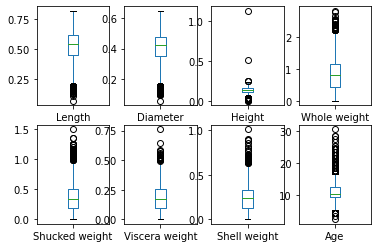

In [36]:
data.plot(kind='box',subplots=True,layout=(2,4))

Here we observed our data is having outliers.

Now we have check the zscore of data

In [37]:
from scipy.stats import zscore

In [38]:
z=np.abs(zscore(data))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [39]:
z.shape

(4177, 8)

In [40]:
threshold= 3 
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [41]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


This is the data with outliers

In [42]:
data= data[(z<3).all(axis=1)]
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


Now outliers remove from the data 

and the shape of the data is shown below after removing the outliers.

In [43]:
data.shape

(4027, 8)

In [44]:
Loss_percentage=(4177-4027)/4177*100
print(Loss_percentage)

3.5910940866650707


# Removing Skweness

In [45]:
from sklearn.preprocessing import power_transform

In [46]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

Dependent variable if stored in y and indipendent variables are saved in x

In [47]:
x.shape

(4027, 7)

In [48]:
y.shape

(4027,)

Now we have aapllied method for removing the skewness from the data, we are using yeo-johnson

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
x=power_transform(x,method='yeo-johnson')

In [51]:
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [52]:
from sklearn.preprocessing import StandardScaler 

In [53]:
sdc=StandardScaler()
xsdc=sdc.fit_transform(x)

In [54]:
x=pd.DataFrame(xsdc)

In [55]:
x

,0,1,2,3,4,5,6
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520


In [56]:
x.shape

(4027, 7)

In [57]:
y.shape

(4027,)

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [59]:
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.5194015389264766
At Random Stat 0, the testing accuracy is:0.4818046108619105


At Random Stat 1, the training accuracy is:0.5179011842814742
At Random Stat 1, the testing accuracy is:0.4867041568800342


At Random Stat 2, the training accuracy is:0.5139840617179326
At Random Stat 2, the testing accuracy is:0.505500840508265


At Random Stat 3, the training accuracy is:0.5135551691686369
At Random Stat 3, the testing accuracy is:0.5064903522479101


At Random Stat 4, the training accuracy is:0.5110098284810829
At Random Stat 4, the testing accuracy is:0.5169136142613011


At Random Stat 5, the training accuracy is:0.5173884156414115
At Random Stat 5, the testing accuracy is:0.49133735518861776


At Random Stat 6, the training accuracy is:0.5104395554810363
At Random Stat 6, the testing accuracy is:0.5185254378480804


At Random Stat 7, the training accuracy is:0.5211341508979476
At Random Stat 7, the testing accuracy is:0.4756517473862033




In [60]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state= 34)

In [61]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

print(r2_score(y_test,pred_test))

0.5131584134415292


# Cross Validation of Model

In [62]:
Train_accuracy= r2_score(y_train, pred_train),
Test_accuracy= r2_score(y_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr, x,y, cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for testting {Test_accuracy}")
    

At cross fold 2 the cv score is 0.5090307146974536 and accuracy score for testting 0.5131584134415292
At cross fold 3 the cv score is 0.4975614022244246 and accuracy score for testting 0.5131584134415292
At cross fold 4 the cv score is 0.4324553558081088 and accuracy score for testting 0.5131584134415292
At cross fold 5 the cv score is 0.4235147420414232 and accuracy score for testting 0.5131584134415292
At cross fold 6 the cv score is 0.4332925115522985 and accuracy score for testting 0.5131584134415292
At cross fold 7 the cv score is 0.44433380182019905 and accuracy score for testting 0.5131584134415292
At cross fold 8 the cv score is 0.409640126241561 and accuracy score for testting 0.5131584134415292
At cross fold 9 the cv score is 0.43074551080831025 and accuracy score for testting 0.5131584134415292


At cross fold 2 the cv score is 0.5090307146974535 and accuracy score for testting 0.5131584134415292

In [63]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


In [64]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [65]:
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 1.529528535980149
Mean squared error 4.396029776674938
Root Mean squared error 2.096671117909277
R2 Score 0.46984286046052703
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 1.4126722047449387
Mean squared error 3.8870050434576795
Root Mean squared error 1.97154889451357
R2 Score 0.5312307741523727
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 1.9404466501240696
Mean squared error 7.295285359801489
Root Mean squared error 2.700978592992082
R2 Score 0.12019530918601795
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.520958675128433
Mean squared error 4.036859925896292
Root Mean squared error 2.0091938497557402
R2 Score 0.5131584134415292
--------------------------

RandomForestRegressor() Having good accuracy.

In [66]:
RF=RandomForestRegressor()
RF.fit(x,y)

RandomForestRegressor()

In [67]:
import pickle
filename='Abalone Case Study.pkl'
pickle.dump(RF,open(filename,'wb'))

In [68]:
import numpy as np
a=np.array(y_test)
predicted= np.array(RF.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,9.5,9.44
1,10.5,10.77
2,10.5,10.91
3,7.5,7.52
4,14.5,13.98
...,...,...
801,8.5,9.50
802,7.5,7.47
803,12.5,12.67
804,7.5,7.53


these are the original and predicted data